In [1]:
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as sl
import sklearn.svm as ss
import matplotlib.cm as cm
from sklearn import metrics
import my_plot_style as mps
import metrics as mm
#mps.my_plot_style()

/Users/twlan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# test https://www.dropbox.com/s/bqu2mchespz8fx8/SDSS_QSO_star_testing.fits?dl=0
# training https://www.dropbox.com/s/js9q7te2nb5sd46/SDSS_QSO_star_training.fits?dl=0

In [2]:
# Data from astroML 
# Not balance dataset / only for illustration purpose

In [3]:
training = pf.open('SDSS_QSO_star_training.fits')
test = pf.open('SDSS_QSO_star_testing.fits')
# Data example taken from astroML https://www.astroml.org/book_figures/chapter9/fig_star_quasar_ROC.html

### data structure 
### training[0].data[object, colors]
### training[1].data[object] label 1 QSO 0 Star

(-0.5, 1.5)

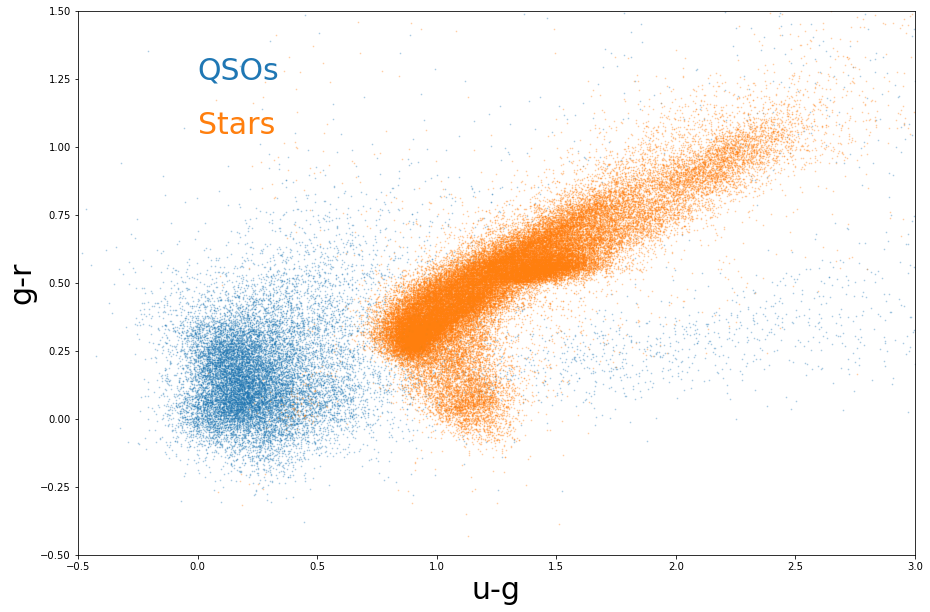

In [4]:
plt.figure(figsize=(15,10))
search = np.where(training[1].data==1) # QSO==1
plt.scatter(training[0].data[search[0],0],training[0].data[search[0],1],c='C0',label='QSO',s=0.5,alpha=0.3)
search = np.where(training[1].data==0) # Star==0
plt.scatter(training[0].data[search[0],0],training[0].data[search[0],1],c='C1',label='Star',s=0.5,alpha=0.3)
plt.xlabel('u-g',fontsize=30)
plt.ylabel('g-r',fontsize=30)
plt.text(0.,1.25,'QSOs',fontsize=30,color='C0')
plt.text(0.,1.05,'Stars',fontsize=30,color='C1')
plt.xlim(-0.5,3)
plt.ylim(-0.5,1.5)

In [5]:
print(len(training[1].data))
print(len(test[1].data))

77948
8661


In [6]:
lg = sl.LogisticRegression() # initial a logistic regression object

In [7]:
# using only the u-g color
colors=training[0].data[:,:2]
lg.fit(colors,training[1].data)

LogisticRegression()

In [8]:
### Probability = 1/(1+e^-t) 
### t = alpha*x+beta

In [9]:
print(lg.coef_)
print(lg.intercept_)

[[-3.48912914 -0.72885471]]
[2.19755905]


In [10]:
probability = 1./(1+np.exp(-1*(-3.69*training[0].data[:,:1]+2.13)))

In [11]:
probability

array([[0.03538748],
       [0.04225464],
       [0.87656128],
       ...,
       [0.01826511],
       [0.34999684],
       [0.04078613]])

In [12]:
y_pred = lg.predict(colors)
y_prob = lg.predict_proba(colors) # output the predicted probability

In [13]:
y_prob

array([[0.96734999, 0.03265001],
       [0.95836432, 0.04163568],
       [0.15691295, 0.84308705],
       ...,
       [0.98158586, 0.01841414],
       [0.65611093, 0.34388907],
       [0.96597659, 0.03402341]])

(-0.5, 1.5)

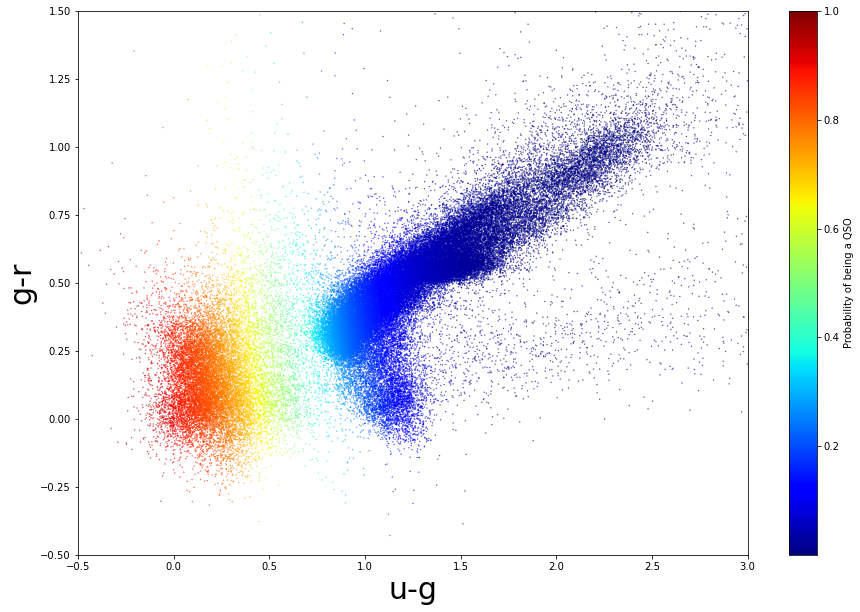

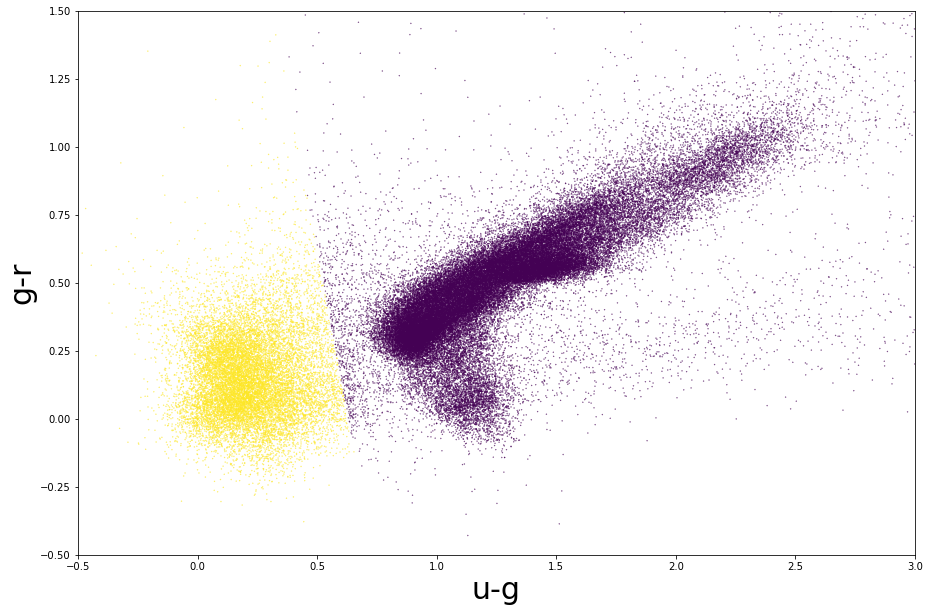

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(training[0].data[:,0],training[0].data[:,1],c=y_prob[:,1],s=0.1,cmap=cm.jet)
plt.colorbar(label='Probability of being a QSO')
#y_prob = lg.predict_proba(training[0].data)
plt.xlabel('u-g',fontsize=30)
plt.ylabel('g-r',fontsize=30)
plt.xlim(-0.5,3)
plt.ylim(-0.5,1.5)
plt.figure(figsize=(15,10))
plt.scatter(training[0].data[:,0],training[0].data[:,1],c=y_pred,s=0.1)#,cmap=cm.jet)
#plt.colorbar(label='Prediction')
#y_prob = lg.predict_proba(training[0].data)
plt.xlabel('u-g',fontsize=30)
plt.ylabel('g-r',fontsize=30)
plt.xlim(-0.5,3)
plt.ylim(-0.5,1.5)

In [15]:
ug=training[0].data[:,:1]
lg.fit(ug,training[1].data)
y_pred = lg.predict(training[0].data[:,:1]) # prediction
# data label training[1].data

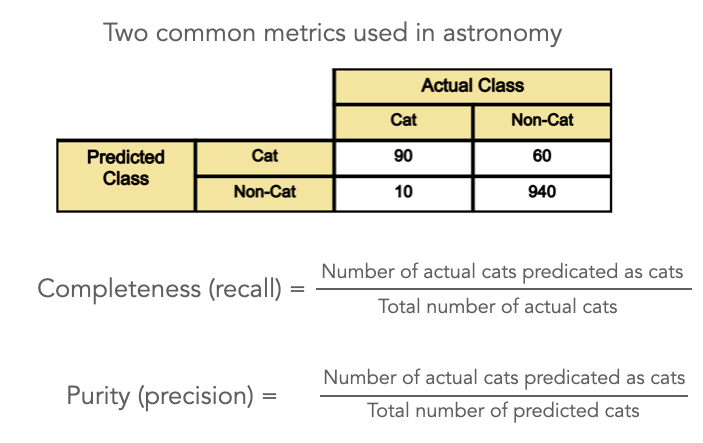

In [16]:
def my_completeness_purity(true_value, prediction):
    
    ### Write 
    
    return completeness, purity

In [17]:
# Write a for loop to record the completeness and purity as a function of number of colors 


In [18]:
### You can also change the probability threshold for selecting QSOs
### y_prob = lg.predict_proba(training[0].data[:,:1])
### threshold = np.arange(0,1,0.01)

### Write a for loop to record the completeness and purity as a function of probability values 
### 

In [19]:
# Compare the metrics from the training set and the test set

In [20]:
completeness, purity = my_completeness_purity(training[1].data,y_pred)

In [21]:
print('Only using u-g')
print('Completeness, purity')
print(completeness, purity)

Only using u-g
Completeness, purity
0.8228141285466126 0.989867646127541


# ------------------------------------------------------------
# Support Vector machine

In [4]:
linear_svm = ss.LinearSVC(C=1,class_weight={0:1,1:1}) # initial a linear svm

#linear_svm = ss.LinearSVC(C=1,class_weight={0:1,1:2}) # initial a linear svm

In [5]:
linear_svm.fit(training[0].data[:,:2],training[1].data)
y_pred = linear_svm.predict(training[0].data[:,:2])

In [6]:
linear_svm.coef_

array([[-0.81549923, -0.26969607]])

In [7]:
linear_svm.intercept_

array([0.4578858])

Text(0, 0.5, 'g-r')

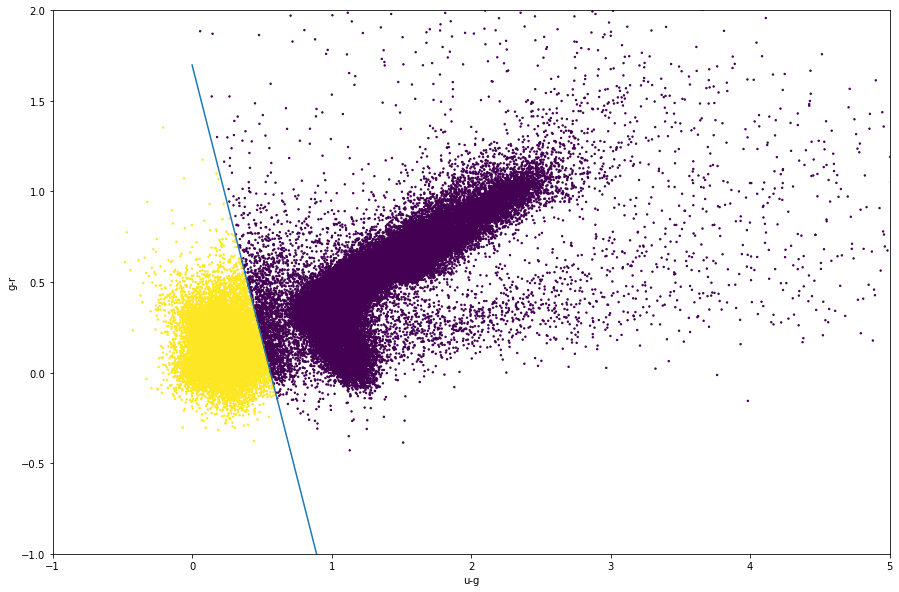

In [8]:
plt.figure(figsize=(15,10))
#plt.plot(np.arange(0,5),np.arange(0,5)*-0.88+0.424)
plt.scatter(training[0].data[:,0],training[0].data[:,1],c=y_pred,s=2,alpha=1)
plt.plot(np.arange(0,5),0.45788581/0.26969608-0.81549923/0.26969608*np.arange(0,5))
plt.ylim(-1,2)
plt.xlim(-1,5)
plt.xlabel('u-g')
plt.ylabel('g-r')

In [27]:
#training[0].data[:,0],training[0].data[:,1]

In [9]:
### Again Write a for loop to record the completeness and purity as a function of number of colors 

### The magic of kernel SVM 

In [10]:
svm = ss.SVC(kernel='rbf')

In [11]:
for i in range(1,5):
    svm.fit(training[0].data[:,:i],training[1].data)
    y_pred = svm.predict(training[0].data[:,:i])
    a, b = mm.completeness_purity(training[1].data,y_pred)
    print(a,b)

0.8948254987629626 0.9822037325937482
0.9419908406590515 0.9809241901003124
0.9515713007316945 0.9851763038857704
0.9680475864610202 0.986270513783117


In [12]:
y_pred = svm.predict(test[0].data[:,:4])

In [13]:
a, b = mm.completeness_purity(test[1].data,y_pred)
print(a,b)

0.9685185185185186 0.9914691943127962


# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree

In [42]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(training[0].data[:,:4],training[1].data)
y_pred = clf.predict(training[0].data[:,:4])
print(mm.completeness_purity(training[1].data,y_pred))

(0.9040901194925515, 0.9835643110754781)


In [43]:
#tree.plot_tree(clf)

In [44]:
y_pred_test = clf.predict(test[0].data[:,:])

In [45]:
print(mm.completeness_purity(test[1].data,y_pred_test))

(0.9004629629629629, 0.9863083164300203)


In [46]:
### You will need to install a few things in order to produce the tree plot

#1. Reference https://www.astroml.org/book_figures/chapter9/fig_rrlyrae_treevis.html
#2. https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb

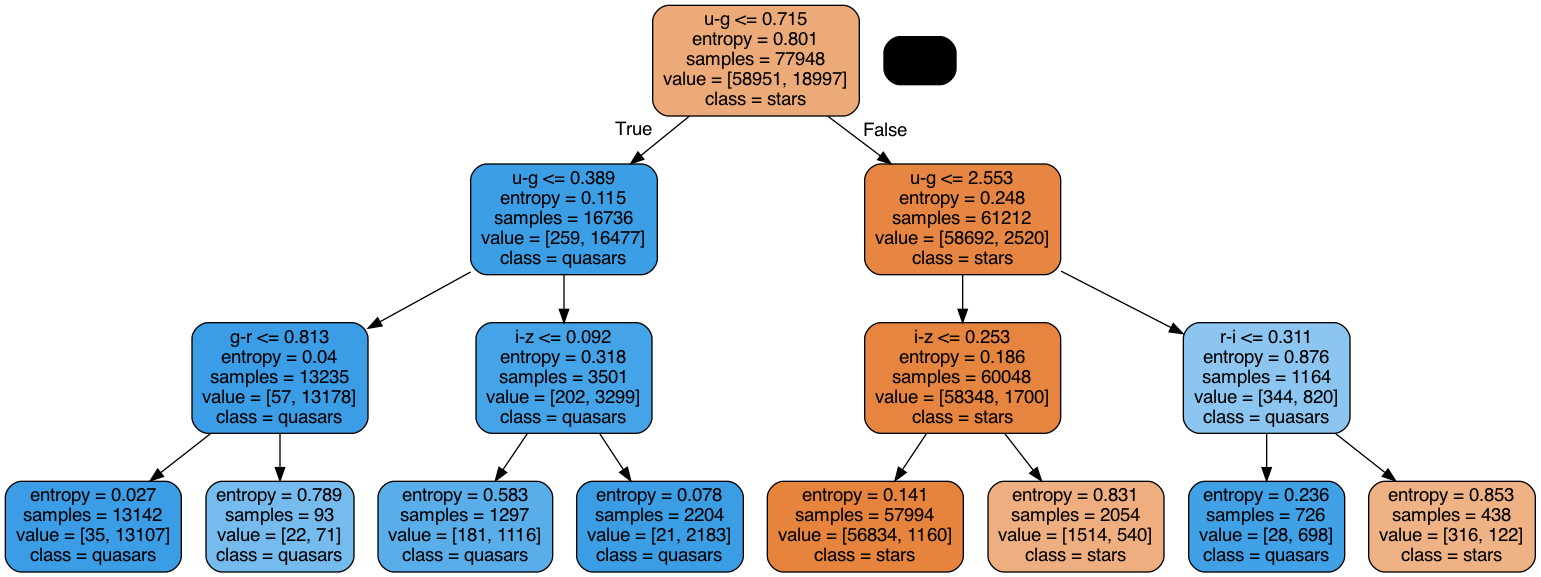

In [47]:
### Create the tree plot
from sklearn.tree import export_graphviz

import pydotplus
from IPython.display import Image
from IPython.display import display
dot_data = export_graphviz(
clf, 
out_file=None,
feature_names=['u-g', 'g-r','r-i','i-z'],  
class_names=['stars', 'quasars'],  
filled=True,
rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [ ]:
### Write a for loop with max_depth from 2-20 and output the completeness, purity for the training set
### as well as the test 
### Make a plot with x-axis max_depth and y-axis purity (training) and purity (test)
### If the performance for training set is much better than the test dataset, this means overfitting.

## Bagging 

In [16]:
import sklearn.ensemble as se 

In [17]:
bagging = se.BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=5),n_estimators=100)




In [18]:
### Write a for loop with max_depth from 2-20 and output the completeness, purity for the training set
### as well as the test 
### Make a plot with x-axis max_depth and y-axis purity (training) and purity (test)

## Random forest

In [19]:
rf = se.RandomForestClassifier(criterion='entropy',max_depth=5,n_estimators=100,max_features=2)

In [20]:
rf.fit(training[0].data[:,:4],training[1].data)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=2)

In [ ]:
### Write a for loop with max_depth from 2-20 and output the completeness, purity for the training set
### as well as the test 
### Make a plot with x-axis max_depth and y-axis purity (training) and purity (test)

In [ ]:
# feature important!!!